In [41]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Подключение к базе данных

In [42]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## Анализировать только пользователей, а не администраторов и сортировать фреймы данных по общему количеству коммитов, сделанных пользователем

In [43]:
query = '''
SELECT
    uid,
    strftime('%w', timestamp) AS weekday,
    strftime('%H', timestamp) AS hour,
    COUNT(*) AS num_commits
FROM
    checker
WHERE
    uid LIKE 'user_%'
GROUP BY
    uid, weekday, hour
'''
df = pd.read_sql(query, conn)

In [44]:
df['weekday'] = df['weekday'].astype(int)
df['hour'] = df['hour'].astype(int)

In [45]:
weekday_pivot = df.pivot_table(index='weekday', columns='uid', values='num_commits', aggfunc='sum', fill_value=0)
hour_pivot = df.pivot_table(index='hour', columns='uid', values='num_commits', aggfunc='sum', fill_value=0)

In [46]:
weekday_order = [1,2,3,4,5,6,0]
weekday_pivot = weekday_pivot.reindex(weekday_order)
weekday_pivot.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [47]:
weekday_pivot = weekday_pivot[weekday_pivot.sum(axis=0).sort_values(ascending=False).index]
hour_pivot = hour_pivot[hour_pivot.sum(axis=0).sort_values(ascending=False).index]

In [48]:
weekday_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Mon to Sun
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_4   7 non-null      int64
 1   user_14  7 non-null      int64
 2   user_2   7 non-null      int64
 3   user_25  7 non-null      int64
 4   user_19  7 non-null      int64
 5   user_26  7 non-null      int64
 6   user_20  7 non-null      int64
 7   user_31  7 non-null      int64
 8   user_10  7 non-null      int64
 9   user_3   7 non-null      int64
 10  user_29  7 non-null      int64
 11  user_13  7 non-null      int64
 12  user_28  7 non-null      int64
 13  user_24  7 non-null      int64
 14  user_12  7 non-null      int64
 15  user_8   7 non-null      int64
 16  user_1   7 non-null      int64
 17  user_21  7 non-null      int64
 18  user_30  7 non-null      int64
 19  user_18  7 non-null      int64
 20  user_17  7 non-null      int64
 21  user_16  7 non-null      int64
 22  user_27  7 non-null      int64


In [49]:
hour_pivot = hour_pivot.reindex(range(24), fill_value=0)
hour_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_4   24 non-null     int64
 1   user_14  24 non-null     int64
 2   user_2   24 non-null     int64
 3   user_25  24 non-null     int64
 4   user_19  24 non-null     int64
 5   user_26  24 non-null     int64
 6   user_20  24 non-null     int64
 7   user_31  24 non-null     int64
 8   user_10  24 non-null     int64
 9   user_3   24 non-null     int64
 10  user_29  24 non-null     int64
 11  user_13  24 non-null     int64
 12  user_28  24 non-null     int64
 13  user_24  24 non-null     int64
 14  user_12  24 non-null     int64
 15  user_8   24 non-null     int64
 16  user_1   24 non-null     int64
 17  user_21  24 non-null     int64
 18  user_30  24 non-null     int64
 19  user_18  24 non-null     int64
 20  user_17  24 non-null     int64
 21  user_16  24 non-null     int64
 22  user_27  24 non-null     int

## Создание тепловых карт

In [50]:
def plot_heatmap(data, cmap, figsize=(15,8)):
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(data, aspect='auto', cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    plt.colorbar(im, cax=cax)
    ax.set_xticks(range(len(data.columns)))
    ax.set_xticklabels(data.columns, rotation=90)
    ax.set_yticks(range(len(data.index)))
    ax.set_yticklabels(data.index)
    fig.set_facecolor('lightgrey')

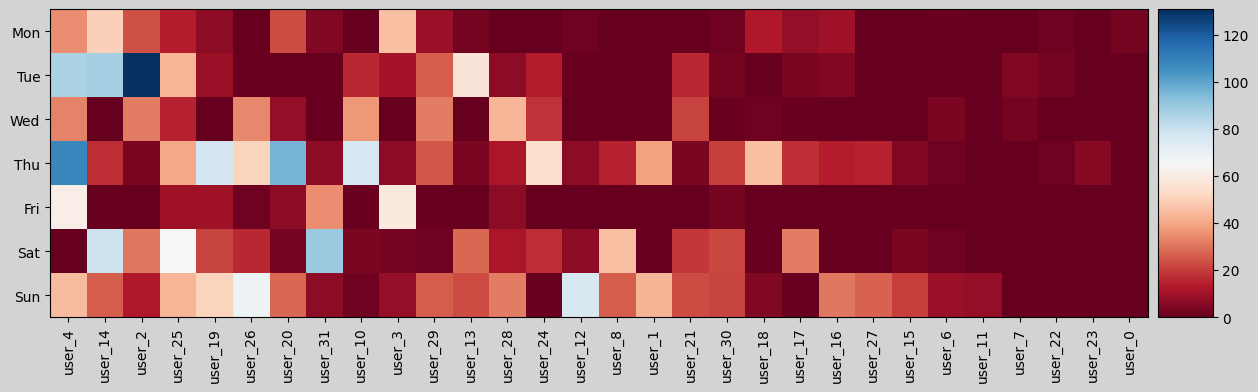

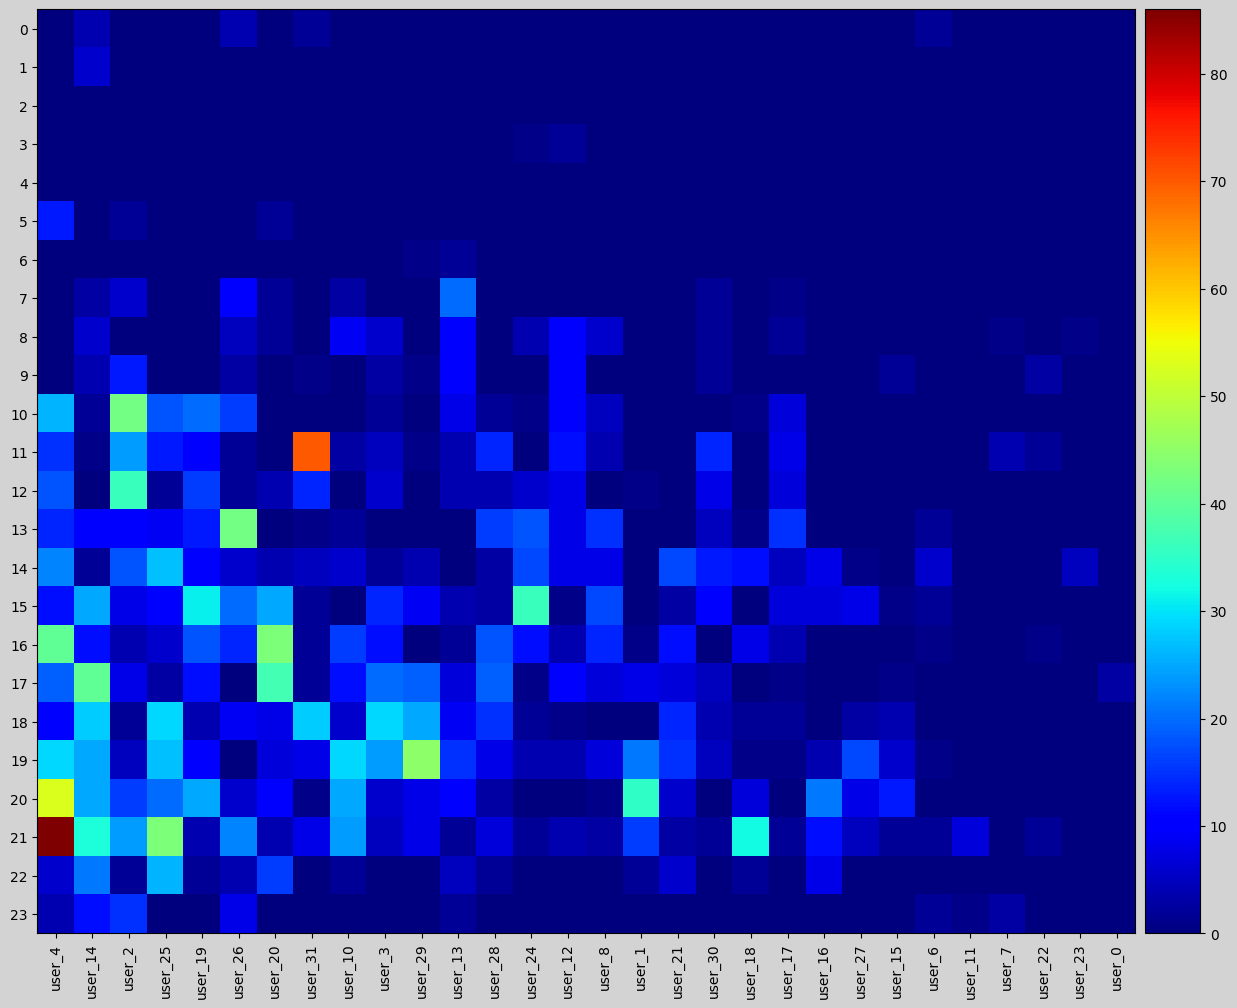

In [51]:
plot_heatmap(weekday_pivot, cmap='RdBu', figsize=(15,4))
plot_heatmap(hour_pivot, cmap='jet', figsize=(15,12))

## Закрыть соеденение

In [52]:
conn.close()

## Ответы на вопросы

## «Какой пользователь имеет больше всего коммитов во вторник?»
user_2

## «Какой пользователь имеет больше всего коммитов в Чт?»
user_4

## «В какой день недели пользователи не любят делать много коммитов?»
Пятница

## «Какой пользователь в какой час сделал наибольшее количество коммитов?»
user_4, в 21